INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm8q1iizi/irxp84w3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm8q1iizi/wysq786l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28965', 'data', 'file=/tmp/tmpm8q1iizi/irxp84w3.json', 'init=/tmp/tmpm8q1iizi/wysq786l.json', 'output', 'file=/tmp/tmpm8q1iizi/prophet_modellg68vebq/prophet_model-20250913134852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:48:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Train set size: 1036
Test set size: 259


13:48:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE): 0.85
Mean Squared Error (MSE): 1.02


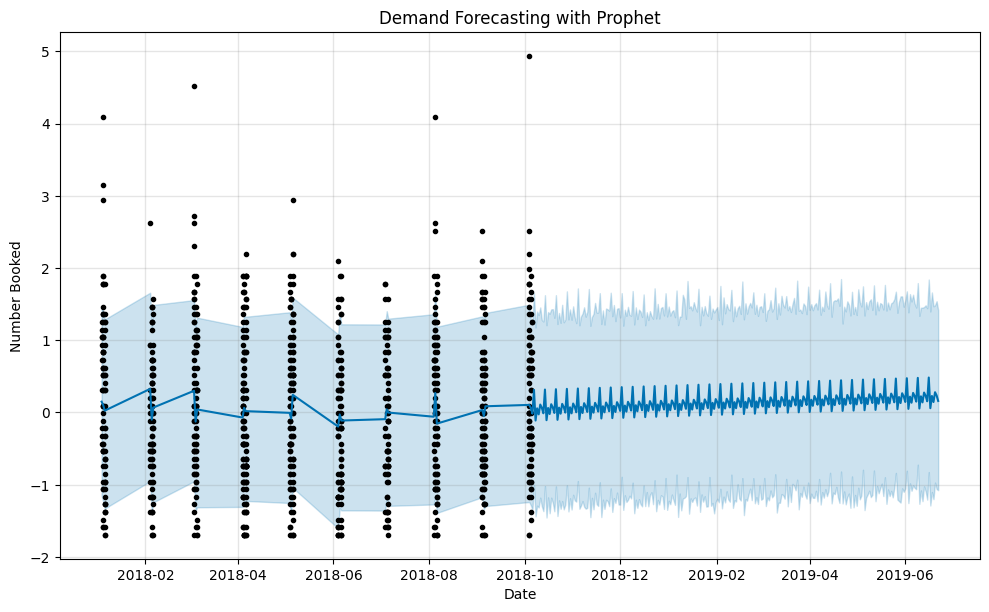

In [7]:
# Import Libraries
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load Data
file_path = '/content/drive/My Drive/CultFit_Project/Cleaned_Classes_April_June_final.csv'
df = pd.read_csv(file_path)

# Step 2: Prepare Time Series Data
df['Date'] = pd.to_datetime(df['BookingEndDateTime'], errors='coerce')
df_ts = df[['Date', 'Number_Booked']].rename(columns={'Date': 'ds', 'Number_Booked': 'y'})

# Remove rows with NaT in the 'ds' column
df_ts = df_ts.dropna(subset=['ds'])

# Sort by Date
df_ts = df_ts.sort_values(by='ds').reset_index(drop=True)

# Step 3: Train-Test Split for Validation
train_size = int(len(df_ts) * 0.8)
train_df = df_ts.iloc[:train_size]
test_df = df_ts.iloc[train_size:]

# Print the sizes of train and test sets
print(f"Train set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

# Step 4: Train Forecasting Model (Prophet)
model = Prophet(daily_seasonality=True)
model.fit(train_df)

# Step 5: Make Forecast
future = model.make_future_dataframe(periods=len(test_df), freq='D')
forecast = model.predict(future)

# Step 6: Evaluate Forecast
# Align forecast with test set
forecasted_values = forecast['yhat'][-len(test_df):].values
actual_values = test_df['y'].values

mae = mean_absolute_error(actual_values, forecasted_values)
mse = mean_squared_error(actual_values, forecasted_values)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Step 7: Plot Forecast
fig1 = model.plot(forecast)
plt.title('Demand Forecasting with Prophet')
plt.xlabel('Date')
plt.ylabel('Number Booked')
plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
